In [2]:
import matplotlib.pyplot as plt
from preprocess import *

plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
# Functions to load all data of each circuit into a pandas DataFrame objects. Details can be found in preprocess.py.

def load_dataset_1():
    path = Path(os.getcwd()).parent / "data" / "circuit-1" # path to data direcotry
    subdirs = ['fase_1', 'fase_2', 'fase_3'] # list of directories to load
    data = pd.DataFrame({'Date/time (UTC)': pd.date_range('2021-06-30 15:00:00', '2021-11-30', freq='1H', closed='left')}) # initial datframe, maximum timespan (timepan based on smart cable guard placement)

    data = load_circuit_data(subdirs, data, path)
    data = load_temp_data(data, path)
    data = load_wop_data(data, path)
    print("loaded dataset 1")
    return data


def load_dataset_2():
    path = Path(os.getcwd()).parent / "data" / "circuit-2" # path to data direcotry
    subdirs = ['fase_1', 'fase_2', 'fase_3'] # list of directories to load
    data = pd.DataFrame({'Date/time (UTC)': pd.date_range('2021-03-23 10:00:00', '2021-11-30', freq='1H', closed='left')}) # initial datframe, maximum timespan (timepan based on smart cable guard placement)

    data = load_circuit_data(subdirs, data, path)
    data = load_temp_data(data, path)
    data = load_wop_data(data, path)
    print("loaded dataset 2")
    return data


def load_dataset_3():
    path = Path(os.getcwd()).parent / "data" / "circuit-3" # path to data direcotry
    subdirs = ['veld_112', 'veld_113'] # list of directories to load
    data = pd.DataFrame({'Date/time (UTC)': pd.date_range('2019-10-1 01:00:00', '2021-11-30', freq='1H', closed='left')}) # initial datframe, maximum timespan (timepan based on smart cable guard placement)

    data = load_circuit_data(subdirs, data, path)
    data = load_temp_data(data, path)
    data = load_wop_data(data, path)
    print("loaded dataset 3")
    return data


data1 = load_dataset_1() #dataset 1
data2 = load_dataset_2() #dataset 2
data3 = load_dataset_3() #dataset 3

loaded dataset 1
loaded dataset 2
loaded dataset 3


In [125]:
data1.head()

,Date/time (UTC),Propagation time (ns) fase_1,PD Detection Sensitivity (pC) fase_1,Total charge (pC) fase_1,Propagation time (ns) fase_2,PD Detection Sensitivity (pC) fase_2,Total charge (pC) fase_2,Propagation time (ns) fase_3,PD Detection Sensitivity (pC) fase_3,Total charge (pC) fase_3,temperature,soil_temperature_level_3,I,P,Q,U
0,2021-06-30 15:00:00,6205.480392,1.504802e+06,0.0,6192.488372,55463.750574,711152.0,6197.400000,291491.663658,0.0,14.3,16.18,4891.23,89.01,1.67,0
1,2021-06-30 16:00:00,6206.333333,1.633283e+06,0.0,6194.444444,54441.787617,794429.5,6196.425000,313897.429238,0.0,14.2,16.16,1822.20,33.38,-4.43,0
2,2021-06-30 17:00:00,6208.076923,1.786027e+06,1065459.0,6193.125000,58963.144152,918059.0,6198.183333,351129.963404,0.0,13.7,16.16,1398.32,25.51,-4.74,0
3,2021-06-30 18:00:00,6207.488372,2.571508e+06,1372308.5,6193.694444,74719.717059,1136242.5,6198.625000,446485.343313,0.0,13.8,16.15,1285.43,23.40,-4.67,0
4,2021-06-30 19:00:00,6206.040541,3.434248e+06,955630.0,6193.725000,72205.086488,1302895.0,6198.975000,440958.943190,0.0,13.8,16.14,422.84,-2.00,-1.24,0


# Sample plots of circuit data

(90289,)
Length difference 2-1: -2.2460294443212776
Length difference 3-2: -0.4887446987240998
Length difference 1-3 2.734774143045371


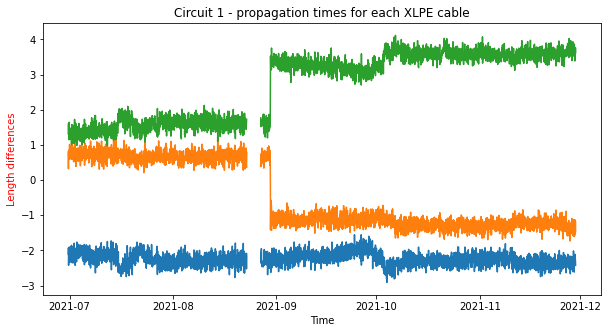

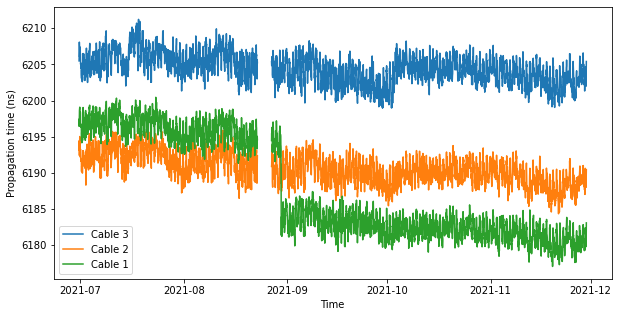

In [79]:
partial_data1 = data1



time=partial_data1["Date/time (UTC)"]
print(time.shape)
f1=partial_data1["Propagation time (ns) fase_1"]
f2=partial_data1["Propagation time (ns) fase_2"]
f3=partial_data1["Propagation time (ns) fase_3"]
temp_soil= partial_data1["soil_temperature_level_3"]

start_time = 0
to_keep = [start_time]
for t in range(start_time + 1, len(time)):
    if time[t] != time[t-1]:
        to_keep.append(t)
time = time[to_keep]

f1a=f1[to_keep];
f2a=f2[to_keep];
f3a=f3[to_keep];
temp_soil=temp_soil[to_keep];


power = partial_data1['P']
power = power[to_keep]


c0=(3*1005*10**9)/(f1a.mean()+ f2a.mean() + f3a.mean())

print("Length difference 2-1:",(f2a - f1a).mean()*c0*10**-9)
print("Length difference 3-2:",(f3a - f2a).mean()*c0*10**-9)
print("Length difference 1-3",(f1a - f3a).mean()*c0*10**-9)

fig, ax1 = plt.subplots()
ax1.set_title("Circuit 1 - propagation times for each XLPE cable")
ax1.set_xlabel("Time")
ax1.set_ylabel('Length differences', color='red')
ax1.plot(time, (f2a-f1a)* c0 * 10**-9)
ax1.plot(time, (f3a-f2a)* c0 * 10**-9)
ax1.plot(time, (f1a-f3a)* c0 * 10**-9)

#ax3 = ax1.twinx()
#ax3.plot(time, power, 'ro')

fig2, ax2 = plt.subplots()
ax2.plot(time, f1a)# * c0 * 10**-9
ax2.plot(time, f2a)
ax2.plot(time, f3a)
ax2.set_xlabel("Time")
ax2.set_ylabel('Propagation time (ns)', color='black')
ax2.legend({'Cable 1', 'Cable 2', 'Cable 3'})

$\psi$

(90289,)
Length difference 2-1: -2.2363399318940558
Length difference 3-2: 0.6849416519438375
Length difference 1-3 1.551398279950217


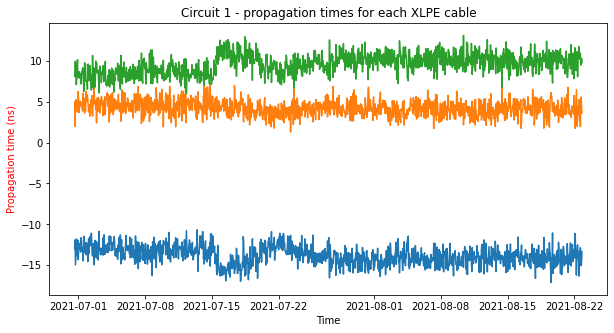

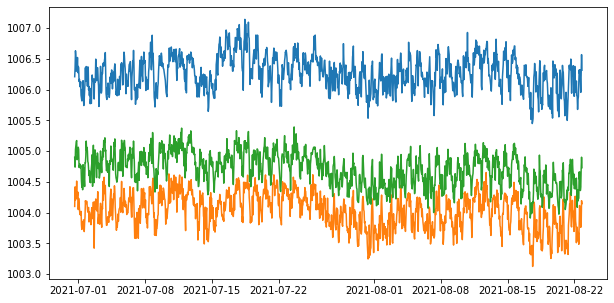

In [81]:
partial_data1 = data1

import numpy as np

time=partial_data1["Date/time (UTC)"]
print(time.shape)
f1=partial_data1["Propagation time (ns) fase_1"]
f2=partial_data1["Propagation time (ns) fase_2"]
f3=partial_data1["Propagation time (ns) fase_3"]
temp_soil= partial_data1["soil_temperature_level_3"]

start_time = 0
to_keep = [start_time]
for t in range(start_time + 1, 35000):
    if time[t] != time[t-1]:
        to_keep.append(t)
time = time[to_keep]

f1a=f1[to_keep];
f2a=f2[to_keep];
f3a=f3[to_keep];
temp_soil=temp_soil[to_keep];


power = partial_data1['P']


c0=(3*1005*10**9)/(f1a.mean()+ f2a.mean() + f3a.mean())

print("Length difference 2-1:",(f2a - f1a).mean()*c0*10**-9)
print("Length difference 3-2:",(f3a - f2a).mean()*c0*10**-9)
print("Length difference 1-3",(f1a - f3a).mean()*c0*10**-9)

fig, ax1 = plt.subplots()
ax1.set_title("Circuit 1 - propagation times for each XLPE cable")
ax1.set_xlabel("Time")
ax1.set_ylabel('Propagation time (ns)', color='red')
ax1.plot(time, f2a-f1a)
ax1.plot(time, f3a-f2a)
ax1.plot(time, f1a-f3a)

fig2, ax2 = plt.subplots()
ax2.plot(time, f1a * c0 * 10**-9)
ax2.plot(time, f2a * c0 * 10**-9)
ax2.plot(time, f3a * c0 * 10**-9)

(90289,)
2188
Length difference 2-1: -2.250107078894928
Length difference 3-2: -1.2129617003034519
Length difference 1-3 3.4630687791983727
2188


C:\Users\KOONDA~1\AppData\Local\Temp/ipykernel_15680/2131439918.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  window_size = np.abs(np.int(window_size))


Text(0, 0.5, 'P')

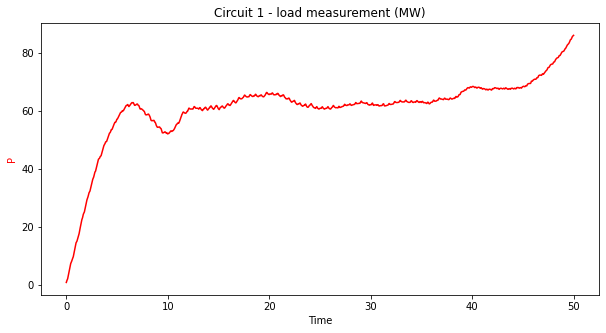

In [145]:
partial_data1 = data1



time=partial_data1["Date/time (UTC)"]
print(time.shape)
f1=partial_data1["Propagation time (ns) fase_1"]
f2=partial_data1["Propagation time (ns) fase_2"]
f3=partial_data1["Propagation time (ns) fase_3"]
temp_soil= partial_data1["soil_temperature_level_3"]
power = partial_data1['P']

start_time = 41000
to_keep = [start_time]
for t in range(start_time + 1,len(time)):
    if time[t] != time[t-1]:
        to_keep.append(t)
time = time[to_keep]
N = len(time)
print(N)

f1b=f1[to_keep];
f2b=f2[to_keep];
f3b=f3[to_keep];
temp_soil=temp_soil[to_keep];
power=power[to_keep]
f1b = f1b[np.logical_not(np.isnan(f1b))]
power =power[np.logical_not(np.isnan(power))]
NnotNans = len(power)





c0=(3*1005*10**9)/(f1b.mean()+ f2b.mean() + f3b.mean())

print("Length difference 2-1:",(f2b - f1b).mean()*c0*10**-9)
print("Length difference 3-2:",(f3b - f2b).mean()*c0*10**-9)
print("Length difference 1-3",(f1b - f3b).mean()*c0*10**-9)

"""
fig, ax1 = plt.subplots()
ax1.set_title("Circuit 1 - propagation times for each XLPE cable")
ax1.set_xlabel("Time")
ax1.set_ylabel('Propagation time (ns)', color='red')
ax1.plot(time, f2b-f1b)
ax1.plot(time, f3b-f2b)
ax1.plot(time, f1b-f3b)

fig2, ax2 = plt.subplots()
ax2.plot(time, f1b * c0 * 10**-9)
ax2.plot(time, f2b * c0 * 10**-9)
ax2.plot(time, f3b * c0 * 10**-9)
"""

from scipy.stats import norm
from sklearn.neighbors import KernelDensity
floattime = np.linspace(0,50,NnotNans)
f1barray=np.array(f1b)
parray=np.array(power)

from scipy import stats

#kde = stats.gaussian_kde(f1barray)
#fig2, ax2 = plt.subplots()
#ax2.plot(floattime, f1barray)
#log_dens = kde.score_samples(floattime.reshape(-1,1))
#print(floattime)
#ax2.plot(floattime, kde(floattime))

def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    import numpy as np
    from math import factorial    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

print(len(parray))



phat = savitzky_golay(parray, 1001,5)
fig1, ax1 = plt.subplots()
ax1.plot(floattime,phat,color='red')
ax1.set_title("Circuit 1 - load measurement (MW)")
ax1.set_xlabel("Time")
ax1.set_ylabel('P', color='red')


In [5]:
print('''

First part ------------------------------------
''')
print("Length difference 2-1:",(f2a - f1a).mean()*c0*10**-9, ' m')
print("Length difference 3-2:",(f3a - f2a).mean()*c0*10**-9, ' m')
print("Length difference 2-1:",(f2a - f1a).mean()*c0*10**-9, ' m')
      
      
print("Length 1:",(f1a).mean()*c0*10**-9, ' m')
print("Length 2:",(f2a).mean()*c0*10**-9, ' m')
print("Length 3:",(f3a).mean()*c0*10**-9, ' m')

print('''

Last part ------------------------------------
''')


print("Length difference 2-1:",(f2b - f1b).mean()*c0*10**-9, ' m')
print("Length difference 3-2:",(f3b - f2b).mean()*c0*10**-9, ' m')
print("Length difference 1-3",(f1b - f3b).mean()*c0*10**-9, ' m')      
      
print("Length 1:",(f1b).mean()*c0*10**-9, ' m')
print("Length 2:",(f2b).mean()*c0*10**-9, ' m')
print("Length 3:",(f3b).mean()*c0*10**-9, ' m')

print('''

Variance length  ------------------------------------
''')

print("Variance of the length: ", ((f1b.mean()*c0*10**-9 - 1005)**2+\
                                   (f2b.mean()*c0*10**-9 - 1005)**2+\
                                   (f3b.mean()*c0*10**-9 - 1005)**2)/3)

      
print('''

Differences  ------------------------------------
''')
print("Delta 1:",(f1b.mean() - f1a.mean())*c0*10**-9, ' m')
print("Delta 2:",(f2b.mean() - f2a.mean())*c0*10**-9, ' m')
print("Delta 3:",(f3b.mean() - f3a.mean())*c0*10**-9, ' m')




First part ------------------------------------

Length difference 2-1: -2.2001364728546817  m
Length difference 3-2: 0.7016262073482553  m
Length difference 2-1: -2.2001364728546817  m
Length 1: 1007.3011343329227  m
Length 2: 1005.1009978600682  m
Length 3: 1005.8026240674163  m


Last part ------------------------------------

Length difference 2-1: -2.2501070788949247  m
Length difference 3-2: -1.2129617003034527  m
Length difference 1-3 3.4630687791983767  m
Length 1: 1006.9043919526978  m
Length 2: 1004.6542848738028  m
Length 3: 1003.4413231734995  m


Variance length  ------------------------------------

Variance of the length:  2.0585670358170507


Differences  ------------------------------------

Delta 1: -0.39674238022501795  m
Delta 2: -0.4467129862653452  m
Delta 3: -2.361300893916819  m


(10000,)
Length difference 2-1: -55.1771637822245


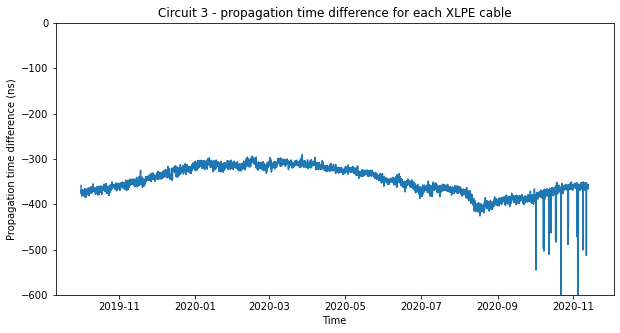

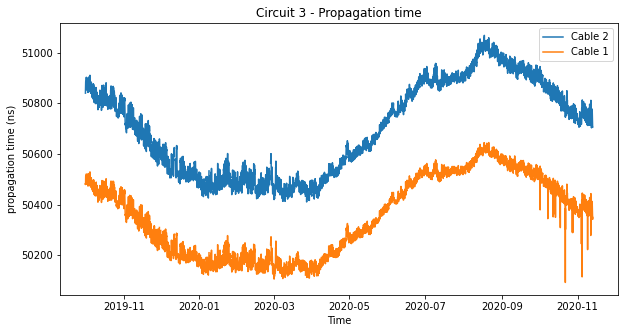

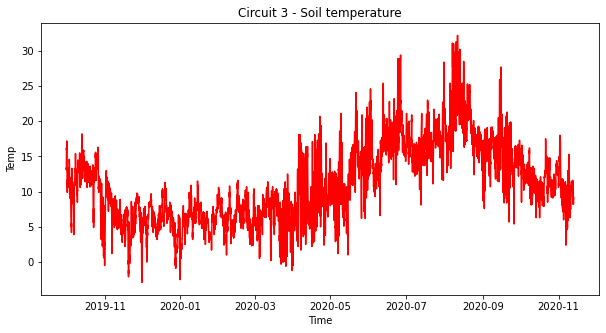

In [93]:
partial_data1 = data3[0:10000]



time=partial_data1["Date/time (UTC)"]
print(time.shape)
f1=partial_data1["Propagation time (ns) veld_112"]
f2=partial_data1["Propagation time (ns) veld_113"]
temp_soil= partial_data1["temperature"]

start_time = 0
to_keep = [start_time]
for t in range(start_time + 1, len(time)):
    if time[t] != time[t-1]:
        to_keep.append(t)
time = time[to_keep]

f1a=f1[to_keep];
f2a=f2[to_keep];
temp_soil=temp_soil[to_keep];


#power = partial_data1['P']
#power = power[to_keep]


c0=(2*8021*10**9)/(f1a.mean()+ f2a.mean())

print("Length difference 2-1:",(f2a - f1a).mean()*c0*10**-9)

fig, ax1 = plt.subplots()
ax1.set_title("Circuit 3 - propagation time difference for each XLPE cable")
ax1.set_xlabel("Time")
ax1.set_ylabel('Propagation time difference (ns)', color='black')
ax1.plot(time, f2a-f1a)
ax1.set_ylim([-600, 0])

#ax3 = ax1.twinx()
#ax3.plot(time, power, 'ro')

fig2, ax2 = plt.subplots()
ax2.plot(time, f1a)
ax2.plot(time, f2a)
ax2.set_title("Circuit 3 - Propagation time")
ax2.set_xlabel("Time")
ax2.set_ylabel('propagation time (ns)', color='black')
ax2.legend({'Cable 1', 'Cable 2'})


fig3, ax3 = plt.subplots()
ax3.set_title("Circuit 3 - Soil temperature")
ax3.set_xlabel("Time")
ax3.set_ylabel('Temp', color='black')
ax3.plot(time, temp_soil, color='red')

(98634,)
Length difference 2-1: 1.7060536355248497


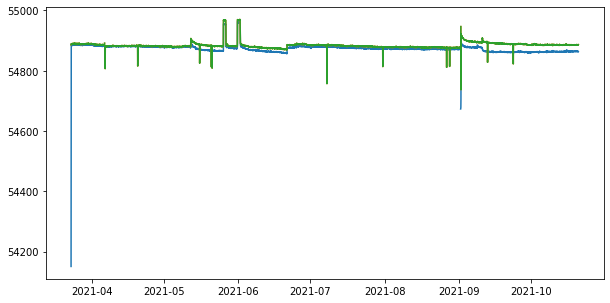

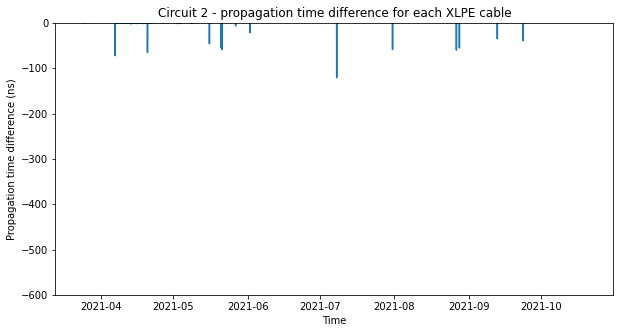

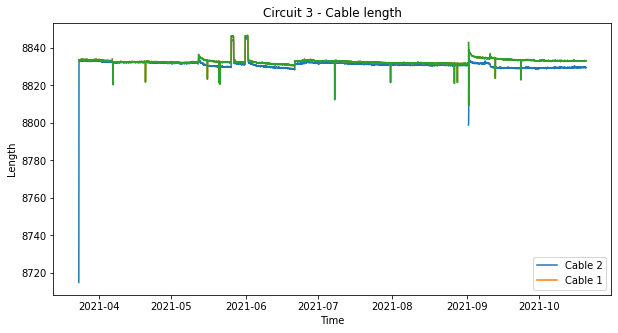

In [43]:
partial_data1 = data2



time=partial_data1["Date/time (UTC)"]
print(time.shape)
f1=partial_data1["Propagation time (ns) fase_1"]
f2=partial_data1["Propagation time (ns) fase_2"]
f3=partial_data1["Propagation time (ns) fase_3"]
temp_soil= partial_data1["temperature"]

start_time = 0
to_keep = [start_time]
for t in range(start_time + 1, len(time)):
    if time[t] != time[t-1]:
        to_keep.append(t)
time = time[to_keep]

f1a=f1[to_keep];
f2a=f2[to_keep];
f3a=f2[to_keep];
temp_soil=temp_soil[to_keep];

fig22, ax22 = plt.subplots()
ax22.plot(time, f1a)
ax22.plot(time, f2a)
ax22.plot(time, f3a)
#ax22.set_ylim([50000, 51000])


c0=(2*8832*10**9)/(f1a.mean()+ f2a.mean())

print("Length difference 2-1:",(f2a - f1a).mean()*c0*10**-9)

fig, ax1 = plt.subplots()
ax1.set_title("Circuit 2 - propagation time difference for each XLPE cable")
ax1.set_xlabel("Time")
ax1.set_ylabel('Propagation time difference (ns)', color='black')
ax1.plot(time, f2a-f1a)
ax1.set_ylim([-600, 0])

#ax3 = ax1.twinx()
#ax3.plot(time, power, 'ro')

fig2, ax2 = plt.subplots()
ax2.plot(time, f1a * c0 * 10**-9)
ax2.plot(time, f2a * c0 * 10**-9)
ax2.plot(time, f3a * c0 * 10**-9)
ax2.set_title("Circuit 3 - Cable length")
ax2.set_xlabel("Time")
ax2.set_ylabel('Length', color='black')
ax2.legend({'Cable 1', 'Cable 2'})

(10000,)
Length difference 2-1: -60.75610404246422


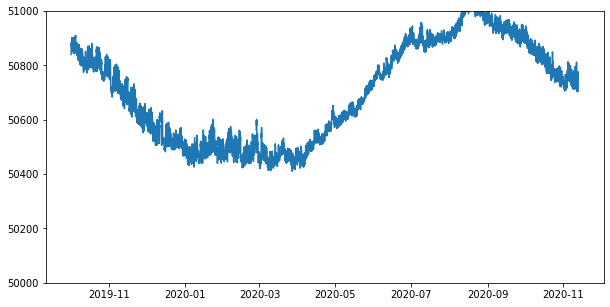

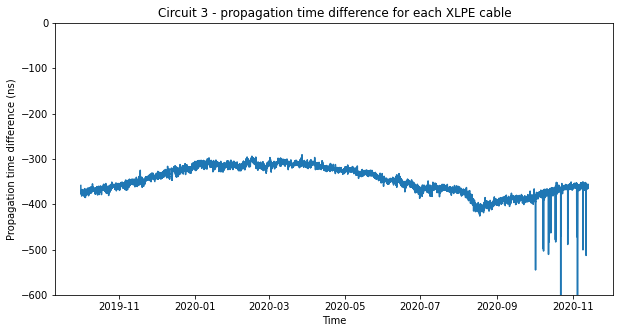

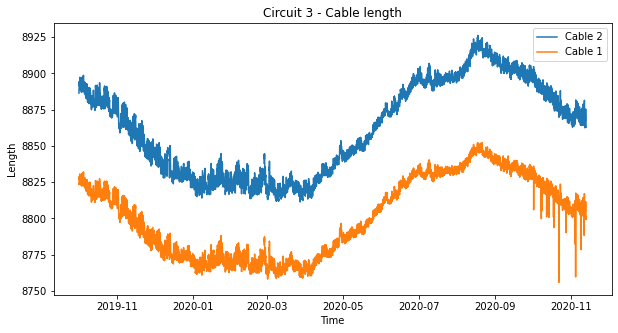

In [32]:
partial_data1 = data3[0:10000]



time=partial_data1["Date/time (UTC)"]
print(time.shape)
f1=partial_data1["Propagation time (ns) veld_112"]
f2=partial_data1["Propagation time (ns) veld_113"]
temp_soil= partial_data1["temperature"]

start_time = 0
to_keep = [start_time]
for t in range(start_time + 1, len(time)):
    if time[t] != time[t-1]:
        to_keep.append(t)
time = time[to_keep]

f1a=f1[to_keep];
f2a=f2[to_keep];
temp_soil=temp_soil[to_keep];

fig22, ax22 = plt.subplots()
ax22.plot(time, f1a)
ax22.set_ylim([50000, 51000])


c0=(2*8832*10**9)/(f1a.mean()+ f2a.mean())

print("Length difference 2-1:",(f2a - f1a).mean()*c0*10**-9)

fig, ax1 = plt.subplots()
ax1.set_title("Circuit 3 - propagation time difference for each XLPE cable")
ax1.set_xlabel("Time")
ax1.set_ylabel('Propagation time difference (ns)', color='black')
ax1.plot(time, f2a-f1a)
ax1.set_ylim([-600, 0])

#ax3 = ax1.twinx()
#ax3.plot(time, power, 'ro')

fig2, ax2 = plt.subplots()
ax2.plot(time, f1a * c0 * 10**-9)
ax2.plot(time, f2a * c0 * 10**-9)
ax2.set_title("Circuit 3 - Cable length")
ax2.set_xlabel("Time")
ax2.set_ylabel('Length', color='black')
ax2.legend({'Cable 1', 'Cable 2'})

In [62]:
partial_data3 = data3

partial_data3.head()

,Date/time (UTC),Propagation time (ns) veld_112,PD Detection Sensitivity (pC) veld_112,Total charge (pC) veld_112,Propagation time (ns) veld_113,PD Detection Sensitivity (pC) veld_113,Total charge (pC) veld_113,temperature,soil_temperature_level_3,V112-I,V112-P,V112-Q,V113-I,V113-P,V113-Q
0,2019-10-01 01:00:00,50839.861111,65259.316628,1151.5,50481.169492,88130.315965,42782.5,13.3,15.25,577.72,7.89,-6.70,569.69,7.84,-6.68
1,2019-10-01 02:00:00,50855.359375,65859.431900,0.0,50484.141667,88673.329122,33104.5,13.1,15.25,518.74,7.07,-6.35,512.11,7.03,-6.29
2,2019-10-01 03:00:00,50849.648936,41642.664689,15748.0,50479.152542,77363.700029,18955.0,14.2,15.25,527.47,7.30,-6.29,516.32,7.17,-6.19
3,2019-10-01 04:00:00,50854.953704,57715.552814,0.0,50484.198276,85705.181114,25426.0,16.2,15.25,548.35,7.75,-5.97,543.61,7.61,-5.97
4,2019-10-01 05:00:00,50873.663462,53589.330788,11598.0,50501.366071,80623.699874,30465.5,16.2,15.25,484.80,7.12,-5.30,479.11,7.01,-5.30


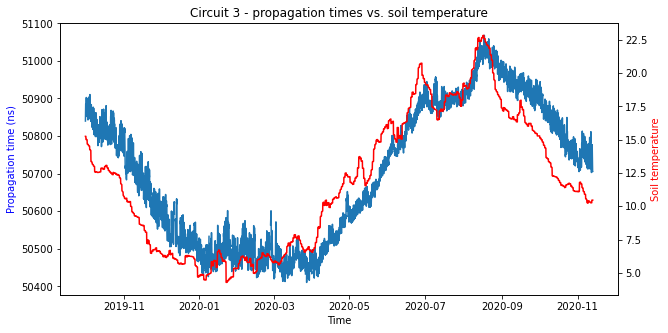

In [6]:
long_data3 = data3[0:10000]

fig2, ax2 = plt.subplots()
ax2.set_title("Circuit 3 - propagation times vs. soil temperature")
ax2.set_xlabel("Time")
ax2.set_ylabel('Propagation time (ns)', color='blue')
ax2.plot(long_data3["Date/time (UTC)"], long_data3["Propagation time (ns) veld_112"])

ax22 = ax2.twinx()
ax22.set_ylabel('Soil temperature', color='red')
ax22.plot(long_data3["Date/time (UTC)"], long_data3["soil_temperature_level_3"], color='red')

In [7]:
print("Correlation between soil temperature and propagation time for circuit 3: ", long_data3["soil_temperature_level_3"].corr(long_data3["Propagation time (ns) veld_112"]))
print("Correlation between air temperature and propagation time for circuit 3: ", long_data3["temperature"].corr(long_data3["Propagation time (ns) veld_112"]))

Correlation between soil temperature and propagation time for circuit 3:  0.900544272593974
Correlation between air temperature and propagation time for circuit 3:  0.7247485488788904


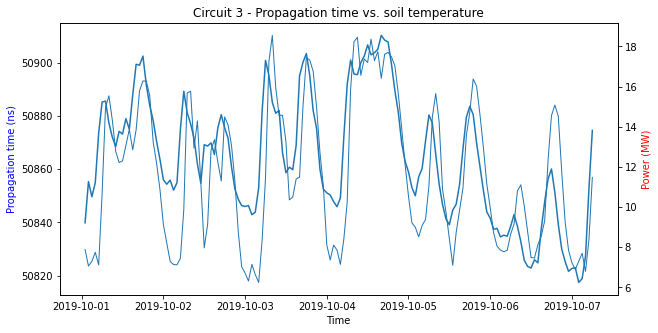

In [7]:
partial_data3 = data3[0:150]

fig3, ax3 = plt.subplots()
ax3.set_title("Circuit 3 - Propagation time vs. soil temperature")
ax3.set_xlabel("Time")
ax3.set_ylabel('Propagation time (ns)', color='blue')
ax3.plot(partial_data3["Date/time (UTC)"], partial_data3["Propagation time (ns) veld_112"])

ax33 = ax3.twinx()
ax33.set_ylabel('Power (MW)', color='red')
ax33.plot(partial_data3["Date/time (UTC)"], partial_data3["V112-P"], linewidth=1.0)


In [8]:
print("Correlation between soil temperature and propagation time for circuit 3 for short period: ", partial_data3["soil_temperature_level_3"].corr(partial_data3["Propagation time (ns) veld_112"]))

Correlation between soil temperature and propagation time for circuit 3 for short period:  0.533073667145546


In [33]:
c0

174790771.50132102